In [1]:

import pandas as pd #reading csv files
import numpy as np #linear algebra
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
%matplotlib inline

#Reading the Loans dataset
train = pd.read_csv("/users/David Pei/Downloads/application_train.csv.zip")
test = pd.read_csv("/users/David Pei/Downloads/application_test.csv.zip")

#dftest = pd.read_csv("/users/David Pei/Downloads/test_Y3WMUE5_7gLdaTN.csv")

In [2]:
train.describe(include = 'all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


In [3]:
print('Training data shape: ', train.shape)

Training data shape:  (307511, 122)


In [4]:
print('Testing data shape: ', test.shape)

Testing data shape:  (48744, 121)


In [5]:
train['TARGET'].value_counts()
#According to the description file, 0 means paid back, 1 means did not pay back

0    282686
1     24825
Name: TARGET, dtype: int64

In [6]:
train.dtypes.value_counts()


float64    65
int64      41
object     16
dtype: int64

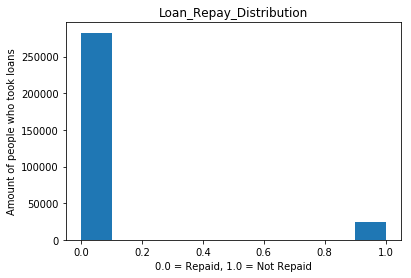

In [7]:
#train['TARGET'].astype(int).plot.hist();
#Loan_Chance_Education = df.pivot_table('Loan_Status', index = ['Education'], aggfunc = lambda x:x.map ({'Y':1, 'N':0}).mean())
#ax1 = Loan_Chance_Education.plot(kind = 'bar')
ax1 = train['TARGET'].astype(int).plot.hist()
ax1.set_xlabel('0.0 = Repaid, 1.0 = Not Repaid')
ax1.set_ylabel('Amount of people who took loans')
ax1.set_title("Loan_Repay_Distribution")
ax1
#The data is imbalanced. There is much more data where the loan was repaid than not.


In [11]:
train.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [7]:
train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                   float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE  

In [8]:
train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)
#How many unique c in classes in columns of object type?
#We will have to label encode these, or one hot encode later on

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [ ]:
correlations = train.corr()['LoanAmount'].sort_values()
correlations
# Display correlations but you'd have to encode the categorical variables first
#print('Most Positive Correlations:\n', correlations.tail(15))
#print('\nMost Negative Correlations:\n', correlations.head(15))

In [10]:
def missingvals(x):
    return sum(x.isnull())
print ("Missing values per column")
print (train.apply(missingvals))
print (train.apply(missingvals, axis = 1).head())
#Looks like there are too many columns to get a good picture of what is missing this way so let's make another function

Missing values per column
SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE  

In [ ]:
missing_vals_table = pd.concat([missingvals], axis=1)

In [26]:
def missingvals(x):  
    # Total missing values
        missing_vals = train.isnull().sum()
        
        # Percentage of missing values
        missing_val_percent = 100 * train.isnull().sum() / len(train)
        
        # Make a table with the results
        missing_val_table = pd.concat([missing_vals, missing_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_rename = missing_val_table.rename(
        columns = {0 : 'Missing Values', 1 : 'Missing % of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_rename = mis_val_table_rename[
            mis_val_table_rename.iloc[:,1] != 0].sort_values(
        'Missing % of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("The training set has " + str(train.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_rename.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_rename

In [ ]:
missingvals(train)
#That's a good a amount of missing values. Some might be important for the model so we have
#to impute them later

In [29]:
train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)
#Let's encode these now

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
# Create a label encoder object
le = LabelEncoder()
le_count = 0 #To keep track how how many columns we encode

# Iterate through the columns
for col in train:
    if train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(train[col].unique())) <= 2:
            # Train on the training data
            le.fit(train[col])
            # Transform both training and testing data
            train[col] = le.transform(train[col])
            test[col] = le.transform(test[col])
            
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [18]:
# one-hot encoding of categorical variables
train = pd.get_dummies(train)
test = pd.get_dummies(test)

print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [19]:
#The train dataset and test dataset should have same number of columns
#But we added more columns to training because of the encoding...also the target variable is in training
train_labels = train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
train, test = train.align(test, join = 'inner', axis = 1)

# Add the target back in
train['TARGET'] = train_labels

print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


In [12]:
pd.crosstab(train.TARGET, train.NAME_CONTRACT_TYPE, dropna=False, normalize='all')
#We can see that there are two types of contract - cash loans and revolving loans. Most of the loans are cash loans which are defaulted

NAME_CONTRACT_TYPE,Cash loans,Revolving loans
TARGET,,
0,0.829274,0.089997
1,0.075513,0.005216


In [13]:
pd.crosstab(train.TARGET, train.CODE_GENDER, dropna=False)
#We can see that women take more loans and higher percentage of them repays the loans. 
#And there are 4 people with unindentified gender, who repayed their loans :)

CODE_GENDER,F,M,XNA
TARGET,,,
0,188278,94404,4
1,14170,10655,0


In [16]:
print('There are {0} people with realty. {1}% of them repay loans.'.format(train[train.FLAG_OWN_REALTY == 'Y'].shape[0], np.round(train[train.FLAG_OWN_REALTY == 'Y'].TARGET.value_counts(normalize=True).values[1], 3) * 100))
print('There are {0} people with cars. {1}% of them repay loans.'.format(train[train.FLAG_OWN_CAR == 'Y'].shape[0], np.round(train[train.FLAG_OWN_CAR == 'Y'].TARGET.value_counts(normalize=True).values[1], 4) * 100))
print('Average age of the car is {:.2f} years.'.format(train.groupby(['FLAG_OWN_CAR'])['OWN_CAR_AGE'].mean().values[1]))

There are 213312 people with realty. 8.0% of them repay loans.
There are 104587 people with cars. 7.24% of them repay loans.
Average age of the car is 12.06 years.


In [17]:
pd.crosstab(train.CNT_CHILDREN, train.NAME_FAMILY_STATUS, dropna=False)
#We can see that most of the people are married and have zero children. 
#In fact we can divide people into two group based on their family status - living together with their partner or single.

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Unknown,Widow
CNT_CHILDREN,,,,,,
0,20947,126575,14132,38810,2,14905
1,6588,43696,4389,5578,0,868
2,1936,22496,1111,958,0,248
3,262,3190,122,85,0,58
4,33,370,12,9,0,5
5,5,74,2,1,0,2
6,2,17,1,0,0,1
7,1,5,0,0,0,1
8,0,2,0,0,0,0
